# 1. import

In [143]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sbn
sbn.set()

# 2. load

In [144]:
df = pd.read_csv('New_York_Airbnb_Enhanced_clean.csv')

In [145]:
df.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,reviews_per_month,calculated_host_listings_count,availability_365,square_feet,bedrooms,price_log,reviews_log,nights_log,amenities_count
0,Brooklyn,Kensington,40.64354,-73.97777,Entire home/apt,0.71,1,189,512.0,1,4.499810,4.143135,1.386294,3
1,Queens,Ridgewood,40.70666,-73.90779,Private room,0.00,1,73,223.0,1,3.433987,0.000000,3.091042,1
2,Manhattan,Hell's Kitchen,40.76116,-73.99016,Private room,0.43,1,0,215.0,1,4.795791,2.890372,1.098612,3
3,Manhattan,Financial District,40.70763,-74.01050,Entire home/apt,1.88,327,272,573.0,1,6.154858,1.791759,1.098612,8
4,Manhattan,East Harlem,40.79658,-73.93287,Entire home/apt,0.80,1,30,559.0,0,5.298317,3.433987,1.098612,5


In [146]:
df.describe(include= 'all')

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,reviews_per_month,calculated_host_listings_count,availability_365,square_feet,bedrooms,price_log,reviews_log,nights_log,amenities_count
count,4950,4950,4950.000000,4950.000000,4950,4950.000000,4950.000000,4950.000000,4950.000000,4950.000000,4950.000000,4950.000000,4950.000000,4950.000000
unique,5,182,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Manhattan,Williamsburg,NaN,NaN,Entire home/apt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,2095,397,NaN,NaN,2522,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,40.728115,-73.951029,NaN,1.078337,6.562626,107.112727,558.151313,1.206869,4.687838,1.968242,1.482388,2.556364
std,NaN,NaN,0.055017,0.046085,NaN,1.627603,29.936661,129.525505,501.987530,0.800859,0.643588,1.559429,0.857799,1.774051
min,NaN,NaN,40.538840,-74.198260,NaN,0.000000,1.000000,0.000000,53.000000,0.000000,0.000000,0.000000,0.693147,1.000000
25%,NaN,NaN,40.689355,-73.982435,NaN,0.040000,1.000000,0.000000,206.000000,1.000000,4.189655,0.693147,0.693147,1.000000
50%,NaN,NaN,40.722240,-73.954890,NaN,0.370000,1.000000,37.000000,333.000000,1.000000,4.615121,1.791759,1.098612,2.000000
75%,NaN,NaN,40.762703,-73.934265,NaN,1.520000,2.000000,213.750000,785.750000,1.000000,5.141664,3.178054,1.791759,3.000000


# 3. preparing data for modelling

## 3.1 Encoding

In [147]:
df = pd.get_dummies(df, columns=['neighbourhood_group', 'room_type'], drop_first=True)

neigh_price = df.groupby('neighbourhood')['price_log'].mean()  ## Calculate the average price for each neighbourhood
df['neighbourhood_encoded'] = df['neighbourhood'].map(neigh_price)  # Map it back to the main dataframe
df = df.drop(columns=['neighbourhood'])
'''
#'Wifi', 'Air conditioning', 'Kitchen', 'Heating', 'Washer', 'Hot water', 'Refrigerator', 'Microwave'
df['Has_Wifi'] = df['amenities'].apply(lambda x: 1 if 'Wifi' in x else 0)
df['Has_AC'] = df['amenities'].apply(lambda x: 1 if 'Air conditioning' in x else 0)
df['Has_Kitchen'] = df['amenities'].apply(lambda x: 1 if 'Kitchen' in x else 0)
df['Has_Heating'] = df['amenities'].apply(lambda x: 1 if 'Heating' in x else 0)
df['Has_Washer'] = df['amenities'].apply(lambda x: 1 if 'Washer' in x else 0)
df['Has_Hot_water'] = df['amenities'].apply(lambda x: 1 if 'Hot water' in x else 0)
df['Has_Refrigerator'] = df['amenities'].apply(lambda x: 1 if 'Refrigerator' in x else 0)
df['Has_Microwave'] = df['amenities'].apply(lambda x: 1 if 'Microwave' in x else 0)
df = df.drop(columns=['amenities'])'''

"\n#'Wifi', 'Air conditioning', 'Kitchen', 'Heating', 'Washer', 'Hot water', 'Refrigerator', 'Microwave'\ndf['Has_Wifi'] = df['amenities'].apply(lambda x: 1 if 'Wifi' in x else 0)\ndf['Has_AC'] = df['amenities'].apply(lambda x: 1 if 'Air conditioning' in x else 0)\ndf['Has_Kitchen'] = df['amenities'].apply(lambda x: 1 if 'Kitchen' in x else 0)\ndf['Has_Heating'] = df['amenities'].apply(lambda x: 1 if 'Heating' in x else 0)\ndf['Has_Washer'] = df['amenities'].apply(lambda x: 1 if 'Washer' in x else 0)\ndf['Has_Hot_water'] = df['amenities'].apply(lambda x: 1 if 'Hot water' in x else 0)\ndf['Has_Refrigerator'] = df['amenities'].apply(lambda x: 1 if 'Refrigerator' in x else 0)\ndf['Has_Microwave'] = df['amenities'].apply(lambda x: 1 if 'Microwave' in x else 0)\ndf = df.drop(columns=['amenities'])"

## 3.2 defining X and y

In [148]:
X = df.drop(columns=['price_log'])
y = df['price_log']

In [149]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. model selection

In [150]:
def predict_and_compare(model, X_test, y_test):
    y_pred = model.predict(X_test)
    np.set_printoptions(precision=2)
    # Convert pandas Series to numpy arrays before reshaping
    y_pred_array = y_pred.to_numpy() if hasattr(y_pred, 'to_numpy') else np.array(y_pred)   
    y_test_array = y_test.to_numpy() if hasattr(y_test, 'to_numpy') else np.array(y_test)
    # Reshape if it's a 1D array
    print(np.concatenate((y_pred_array.reshape(len(y_pred_array), 1), 
                     y_test_array.reshape(len(y_test_array), 1)), 1))
    
    return y_pred

In [151]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
def evaluation(model_name, y_true, y_pred):
    """
    Prints standard regression metrics for a given model.
    """
    r2 = r2_score(y_true, y_pred)
    r2_original = r2_score(np.expm1(y_test), np.expm1(y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mape = mean_absolute_percentage_error(y_true, y_pred)
    acc = accuracy_score(y_true, y_pred)
    
    print(f"--- {model_name} Performance ---")
    print(f"R2 Score : {r2:.4f}")
    print(f"R2 (orig): {r2_original:.4f}")
    print(f"MAE      : ${mae:.2f}")
    print(f"RMSE     : ${rmse:.2f}")
    print(f"MAPE     : {mape:.2%}")
    print(f"ACC      : {acc:.2%}")
    print("-" * 30)
    return r2

In [152]:
def plot_residuals(model_name, y_true, y_pred):
    plt.figure(figsize=(8, 5))
    plt.scatter(y_true, y_true - y_pred, alpha=0.5)
    plt.axhline(y=0, color='red', linestyle='--')
    plt.xlabel("Actual Price ($)")
    plt.ylabel("Error (Actual - Predicted)")
    plt.title(f"{model_name}: Residual Plot")
    plt.show()

## 4.1 LinearRegression

In [153]:
from sklearn.linear_model import LinearRegression
l_regressor = LinearRegression()
l_regressor.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


[[4.07 3.71]
 [4.45 4.39]
 [4.3  4.26]
 ...
 [4.45 4.75]
 [5.13 5.42]
 [4.97 4.65]]
--- Linear Regression Performance ---
R2 Score : 0.7783
MAE      : $0.23
RMSE     : $0.32
MAPE     : 1912606350790588.75%
------------------------------


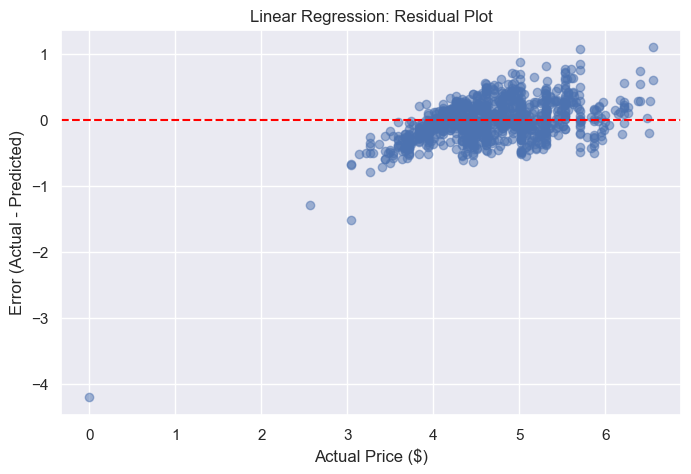

In [154]:
l_y_pred = predict_and_compare(l_regressor, X_test, y_test)
lr_score = evaluationn("Linear Regression", y_test, l_y_pred)
plot_residuals("Linear Regression", y_test, l_y_pred)

## 4.2 DecisionTreeRegressor

In [155]:
from sklearn.tree import DecisionTreeRegressor
dt_regressor = DecisionTreeRegressor(random_state = 0)
dt_regressor.fit(X_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


[[3.91 3.71]
 [5.17 4.39]
 [4.8  4.26]
 ...
 [4.71 4.75]
 [5.02 5.42]
 [4.98 4.65]]
--- Decision Tree Performance ---
R2 Score : 0.6623
MAE      : $0.29
RMSE     : $0.39
MAPE     : 1788623076204353.50%
------------------------------


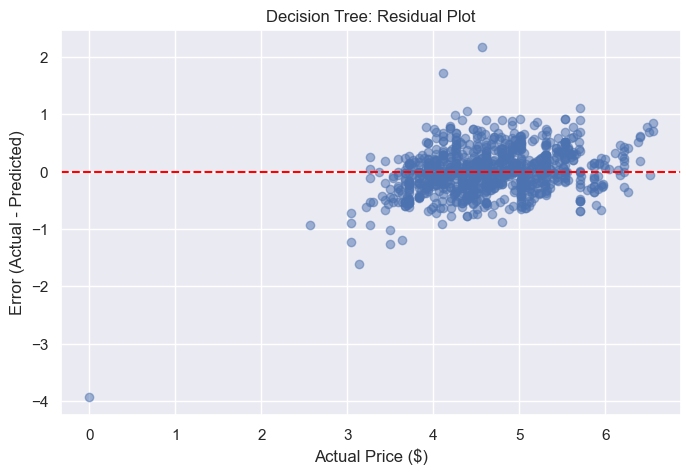

In [156]:
dt_y_pred = predict_and_compare(dt_regressor, X_test, y_test)
dt_score = evaluationn("Decision Tree", y_test, dt_y_pred)
plot_residuals("Decision Tree", y_test, dt_y_pred)

## 4.3 RandomForestRegressor

In [157]:
'''from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor(n_estimators = 50, random_state = 42)
rf_regressor.fit(X_train, y_train)'''
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor(
    n_estimators=300,
    max_depth=20,
    min_samples_split=5,
    random_state=42
)
rf_regressor.fit(X_train, y_train)

,n_estimators,300
,criterion,'squared_error'
,max_depth,20
,min_samples_split,5
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


[[3.87 3.71]
 [4.81 4.39]
 [4.17 4.26]
 ...
 [4.39 4.75]
 [5.24 5.42]
 [5.16 4.65]]
--- Random Forest Performance ---
R2 Score : 0.7978
MAE      : $0.22
RMSE     : $0.30
MAPE     : 1850511154641182.00%
------------------------------


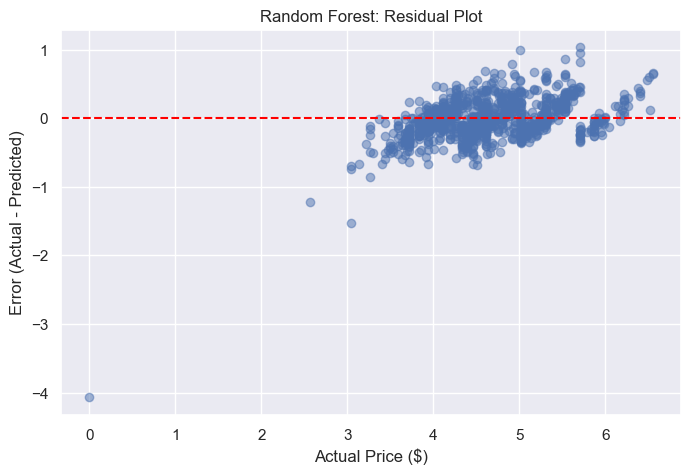

In [158]:
rf_y_pred   = predict_and_compare(rf_regressor, X_test, y_test)
rf_score = evaluationn("Random Forest", y_test, rf_y_pred)
plot_residuals("Random Forest", y_test, rf_y_pred)

## 4.4 SVR

In [159]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train_scaled = sc_X.fit_transform(X_train)
X_test_scaled = sc_X.transform(X_test)

# Reshape y_train to make it 2D
y_train_reshaped = y_train.values.reshape(-1, 1)
y_train_scaled = sc_y.fit_transform(y_train_reshaped)
y_train_scaled = y_train_scaled.flatten()

In [160]:
from sklearn.svm import SVR
svr_regressor = SVR(C=10, gamma='scale', kernel='rbf')
svr_regressor.fit(X_train_scaled, y_train_scaled)


,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,tol,0.001
,C,10
,epsilon,0.1
,shrinking,True
,cache_size,200
,verbose,False
,max_iter,-1


In [161]:
svr_pred_scaled = svr_regressor.predict(X_test_scaled)
svr_pred = sc_y.inverse_transform(svr_pred_scaled.reshape(-1, 1)).flatten()

In [162]:
svr_pred_scaled = svr_regressor.predict(X_test_scaled)
svr_y_pred = sc_y.inverse_transform(svr_pred_scaled.reshape(-1, 1))
svr_r2_score = r2_score(y_test, svr_y_pred)
evaluation("SVR",y_test, svr_y_pred)

--- SVR Performance ---
R2 Score : 0.7633
R2 (orig): 0.7389
MAE      : $0.23
RMSE     : $0.33
MAPE     : 1898381324482668.75%
------------------------------


0.7633480549334625

## 4.5 XGBoost

In [168]:
from xgboost import XGBRegressor

xgb = XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=8,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='reg:squarederror',
    random_state=42
)

xgb.fit(X_train, y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


--- XGBoost Performance ---
R2 Score : 0.7893
R2 (orig): 0.8052
MAE      : $0.22
RMSE     : $0.31
MAPE     : 1834292680517822.75%
------------------------------


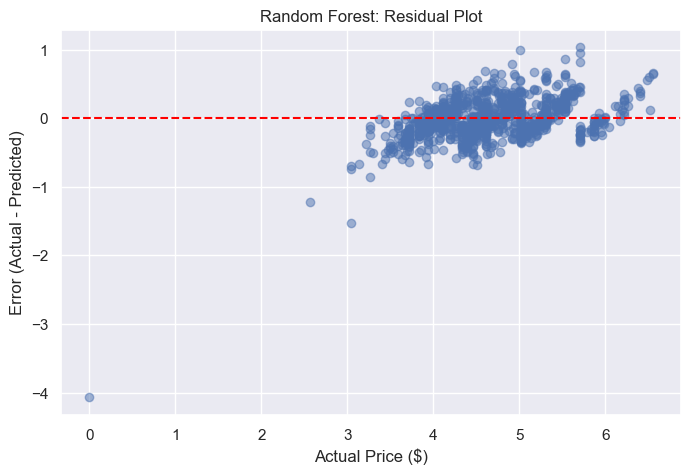

In [172]:
from sklearn.metrics import confusion_matrix, accuracy_score
xg_y_pred = xgb.predict(X_test)
xg_r2_score = evaluation("XGBoost", y_test, xg_y_pred)
plot_residuals("Random Forest", y_test, rf_y_pred)

# 5. evaluation

In [174]:
results = {
    'Linear Regression': lr_score,
    'Decision Tree': dt_score,
    'Random Forest': rf_score,
    'SVR': svr_r2_score,
    'XGBoost': xg_r2_score
}
print("\n====== FINAL R2 SCORES ======")
# Sort by best score
sorted_results = dict(sorted(results.items(), key=lambda item: item[1], reverse=True))
for model, score in sorted_results.items():
    print(f"{model}: {score:.4f}")


====== FINAL R2 SCORES ======
Random Forest: 0.7978
XGBoost: 0.7893
Linear Regression: 0.7783
SVR: 0.7633
Decision Tree: 0.6623


# 6. Power BI

KeyError: 'room_type'